In [230]:
# PACKAGES
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn import metrics
import seaborn as sns
from mpl_toolkits.basemap import Basemap
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction import  dict_vectorizer
import statsmodels.api as sm
from scipy import stats


In [231]:
#Importing data
data=pd.read_csv('nas-pupil-marks.csv')
data

,STUID,State,District,Gender,Age,Category,Same language,Siblings,Handicap,Father edu,...,Express science views,Watch TV,Read magazine,Read a book,Play games,Help in household,Maths %,Reading %,Science %,Social %
0,11011001001,AP,1,1,3,3,1,5,2,1,...,3,3,4,3,4,4,20.37,NaN,27.78,NaN
1,11011001002,AP,1,2,3,4,2,5,2,2,...,3,4,4,3,4,4,12.96,NaN,38.18,NaN
2,11011001003,AP,1,2,3,4,2,5,2,1,...,3,4,3,3,4,4,27.78,70.00,NaN,NaN
3,11011001004,AP,1,2,3,3,2,4,2,1,...,3,4,3,3,4,4,NaN,56.67,NaN,36.00
4,11011001005,AP,1,2,3,3,2,5,2,1,...,3,2,3,3,4,4,NaN,NaN,14.55,8.33
5,11011001006,AP,1,2,3,3,1,5,2,3,...,1,4,3,2,4,4,NaN,23.33,NaN,30.00
6,11011001007,AP,1,2,3,4,2,2,2,1,...,3,4,4,4,4,4,40.74,70.00,NaN,NaN
7,11011001008,AP,1,2,2,0,2,4,2,1,...,3,4,3,3,3,4,NaN,26.67,NaN,22.92
8,11011001009,AP,1,2,3,3,2,4,2,1,...,3,4,3,3,4,4,24.07,NaN,25.45,NaN
9,11011001010,AP,1,2,2,4,2,3,2,1,...,3,4,3,4,3,4,18.52,26.67,NaN,NaN


In [232]:
# Adding geographical divisions of parts of india for further study
conditions = [
    (data['State'] == 'AN'), (data['State'] == 'AP'),(data['State'] == 'AR'),(data['State'] == 'BR'),(data['State'] == 'CG'),
    (data['State'] == 'CH'), (data['State'] == 'DD'),(data['State'] == 'DL'),(data['State'] == 'DN'),(data['State'] == 'GA'),
    (data['State'] == 'GJ'),(data['State'] == 'HP'),(data['State'] == 'HR'),(data['State'] == 'JH'),(data['State'] == 'JK'),
    (data['State'] == 'KA'),(data['State'] == 'KL'),(data['State'] == 'MG'),(data['State'] == 'MH'),(data['State'] == 'MN'),
    (data['State'] == 'MP'),(data['State'] == 'MZ'),(data['State'] == 'NG'),(data['State'] == 'OR'),(data['State'] == 'PB'),
    (data['State'] == 'PY'),(data['State'] == 'RJ'),(data['State'] == 'SK'),(data['State'] == 'TN'),(data['State'] == 'TR'),
    (data['State'] == 'UK'),(data['State'] == 'UP'),(data['State'] == 'WB')]
div=['Union Territory','South India','East India','East India','Central India','Union Territory','Union Territory','Union Territory','Union Territory','West India','North India','North India','North India','East India','North India','South India','South India','East India','West India','East India','Central India'
    ,'East India','East India','North India','North India','Union Territory','North India','North India','South India','North India','North India','North India','East India']
data['division'] = np.select(conditions, div)

In [233]:
# Adding latitude and longitude for constructing Basemap
conditions = [
    (data['State'] == 'AN'), (data['State'] == 'AP'),(data['State'] == 'AR'),(data['State'] == 'BR'),(data['State'] == 'CG'),
    (data['State'] == 'CH'), (data['State'] == 'DD'),(data['State'] == 'DL'),(data['State'] == 'DN'),(data['State'] == 'GA'),
    (data['State'] == 'GJ'),(data['State'] == 'HP'),(data['State'] == 'HR'),(data['State'] == 'JH'),(data['State'] == 'JK'),
    (data['State'] == 'KA'),(data['State'] == 'KL'),(data['State'] == 'MG'),(data['State'] == 'MH'),(data['State'] == 'MN'),
    (data['State'] == 'MP'),(data['State'] == 'MZ'),(data['State'] == 'NG'),(data['State'] == 'OR'),(data['State'] == 'PB'),
    (data['State'] == 'PY'),(data['State'] == 'RJ'),(data['State'] == 'SK'),(data['State'] == 'TN'),(data['State'] == 'TR'),
    (data['State'] == 'UK'),(data['State'] == 'UP'),(data['State'] == 'WB')]
lat = [11.66702557,14.7504291,27.10039878,25.78541445,22.09042035,30.71999697,21.4283,28.6699929,20.26657819,15.491997,
      22.2587,31.10002545,27.75000633,23.80039349,34.29995933,12.57038129,8.900372741,25.57049217,19.25023195,24.79997072,
      21.30039105,23.71039899,25.6669979,19.82042971,31.51997398,11.93499371,26.44999921,27.3333303,12.92038576,23.83540428,
      30.0668,27.59998069,22.58039044]
lon=[92.73598262,78.57002559,93.61660071,87.4799727,82.15998734,76.78000565,72.8397,77.23000403,73.0166178,73.81800065,71.1924,
    77.16659704,76.01999101,86.41998572,74.46665849,76.91999711,76.56999263,91.8800142,73.16017493,93.95001705,76.13001949,
    92.72001461,94.11657019,85.90001746,75.98000281,79.83000037,74.63998124,88.6166475,79.15004187,91.27999914,79.0193,
    78.05000565,88.32994665]
data['lat'] = np.select(conditions, lat)
data['lon'] = np.select(conditions, lon)



In [234]:
# Renaming the names of the state
conditions = [
    (data['State'] == 'AN'), (data['State'] == 'AP'),(data['State'] == 'AR'),(data['State'] == 'BR'),(data['State'] == 'CG'),
    (data['State'] == 'CH'), (data['State'] == 'DD'),(data['State'] == 'DL'),(data['State'] == 'DN'),(data['State'] == 'GA'),
    (data['State'] == 'GJ'),(data['State'] == 'HP'),(data['State'] == 'HR'),(data['State'] == 'JH'),(data['State'] == 'JK'),
    (data['State'] == 'KA'),(data['State'] == 'KL'),(data['State'] == 'MG'),(data['State'] == 'MH'),(data['State'] == 'MN'),
    (data['State'] == 'MP'),(data['State'] == 'MZ'),(data['State'] == 'NG'),(data['State'] == 'OR'),(data['State'] == 'PB'),
    (data['State'] == 'PY'),(data['State'] == 'RJ'),(data['State'] == 'SK'),(data['State'] == 'TN'),(data['State'] == 'TR'),
    (data['State'] == 'UK'),(data['State'] == 'UP'),(data['State'] == 'WB')]
states=['Andaman & Nicobar','Andhra Pradesh','Arunachal Pradesh','Bihar','Chattisgarh','Chandigarh','Daman & Diu','Delhi','Dadra & Nagar Haveli',
     'Goa','Gujarat','Himachal Pradesh','Haryana','Jharkhand','Jammu & Kashmir','Karnataka','Kerala','Meghalaya','Maharashtra','Manipur'
     ,'Madhya Pradesh','Mizoram','Nagaland','Orissa','Punjab','Pondicherry','Rajasthan','Sikkim','Tamil Nadu','Tripura',
    'Uttarakhand','Uttar Pradesh','West Bengal']
state1=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33]
data['State'] = np.select(conditions, states)
data['state_num']=np.select(conditions,state1)

In [235]:
# Renaming Gender values
conditions = [
    (data['Gender'] == 1), (data['Gender'] == 2)]
gen=['Boy','Girl']
data['Gender']=np.select(conditions,gen)
# Adding Total % column by taking mean of the students subjects
data['Total %'] = data[['Maths %', 'Reading %','Science %','Social %']].mean(axis=1)
data=data[data['Total %'].isnull()==0]


In [236]:
# Adding additional Category column
bins = [0, 25, 50, 75, 100]
group_names =['Below Average', 'Average', 'Above Average', 'Excellent']
categories = pd.cut(data['Total %'], bins, labels=group_names)
data['categories'] = pd.cut(data['Total %'], bins, labels=group_names)
data['scoresBinned'] = pd.cut(data['Total %'], bins)

C:\Users\SONY\Anaconda2\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\SONY\Anaconda2\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


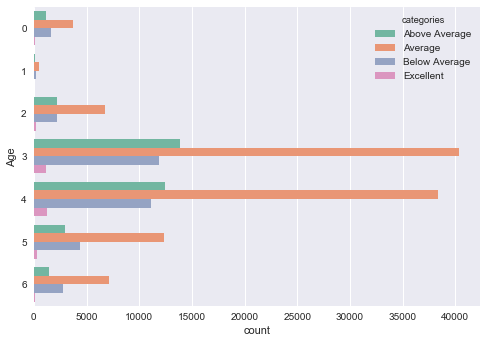

In [80]:
# Count Plot
x=sns.countplot(y='Age',hue='categories',data=data,palette='Set2') 
sns.plt.show()


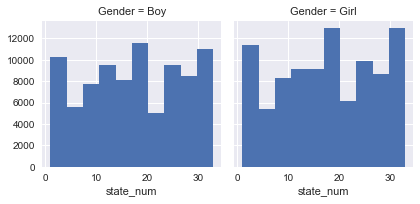

In [68]:
# Facet Histogram
data1=data[data['Gender']!='0']
fn=sns.FacetGrid(data1,col='Gender')# Histogram
fn=fn.map(plt.hist,'state_num')
sns.plt.show()



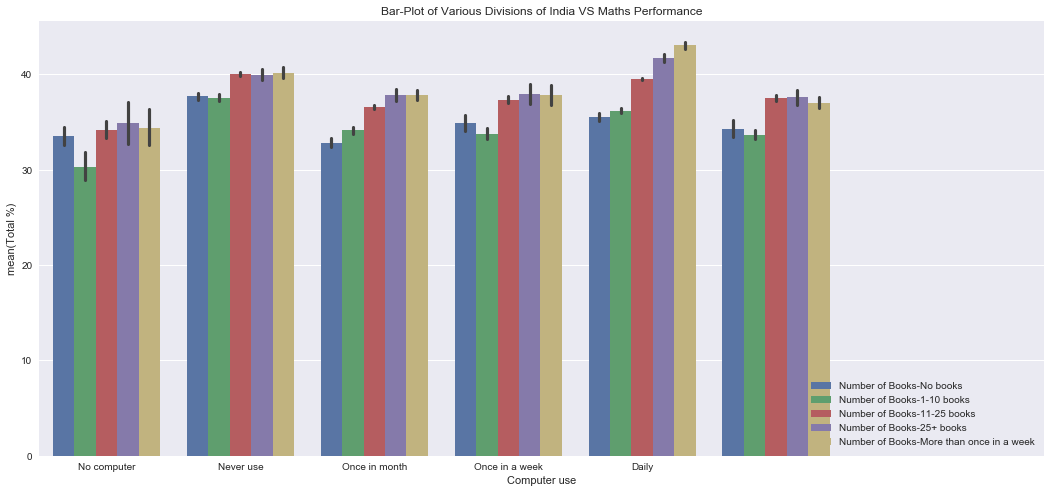

In [69]:
# Pair Bar Plot
number = [0,1,2,3,4,5,6,7]
LABELS = ["No computer" ,"Never use",'Once in month','Once in a week','Daily']
total=float(len(data))
sns.plt.figure(figsize=(18, 8))
sns.plt.title('Bar-Plot of Various Divisions of India VS Maths Performance')
sns.barplot(x='Computer use',y='Total %',hue='# Books',orient='v',data=data1) 
#  Plotting Bar plot 
L=plt.legend() # Editing the Label box by Legend
L.get_texts()[0].set_text('Number of Books-No books')
L.get_texts()[1].set_text('Number of Books-1-10 books')
L.get_texts()[2].set_text('Number of Books-11-25 books')
L.get_texts()[3].set_text('Number of Books-25+ books')
L.get_texts()[4].set_text('Number of Books-More than once in a week')
# Logic for creating percentage text annotation
for p in x.patches: 
    height = p.get_height()
    x.text(p.get_x()+p.get_width()/2., height + 3, 
        '{:1.2f}'.format(height), ha="center")
sns.plt.xticks(number, LABELS)
sns.plt.show()


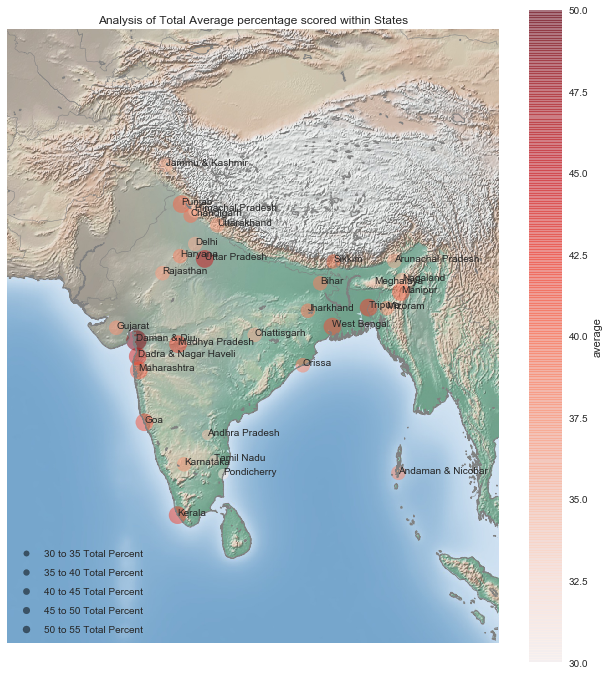

In [50]:
# Logic for creating Map Plot
map_data = data.groupby(['State','lat','lon'])['Total %'].mean().reset_index(name='average')
bins = [30, 35, 40, 45, 50]
group_names =[ 100, 200, 300,400]
categories = pd.cut(map_data ['average'], bins, labels=group_names)
map_data ['categories'] = pd.cut(map_data ['average'], bins, labels=group_names)
## Map Plotting by BaseMap
lat=map_data['lat'].values
lon=map_data['lon'].values
state=map_data['State'].values
average=map_data['average'].values
type1=map_data['categories'].values
fig=plt.figure(figsize=(11,12))
plt.title('Analysis of Total Average percentage scored within States')
m=Basemap(projection='lcc',resolution='h',width=4E6,height=5E6,lat_0=22,lon_0=82)
m.etopo(scale=0.5,alpha=0.5)
m.shadedrelief()
m.drawcoastlines(color='gray')
m.drawcountries(color='gray')
m.drawstates(color='gray')

for row in map_data.iterrows():
    x,y=m(row[1][2],row[1][1])
   
    plt.text(x,y,row[1][0],fontsize=10)
m.scatter(lon,lat,latlon=True,c=average,s=type1,cmap='Reds',alpha=0.5)
plt.colorbar(label='average')
plt.clim(30,50)
for a in [30,35, 40, 45, 50]:
    z=a+5
    plt.scatter([],[],c='k',alpha=0.5,s=a,label=str(a)+' to '+str(z) +' Total Percent')
    plt.legend(scatterpoints=1,frameon=False,labelspacing=1,loc='lower left')

plt.show()

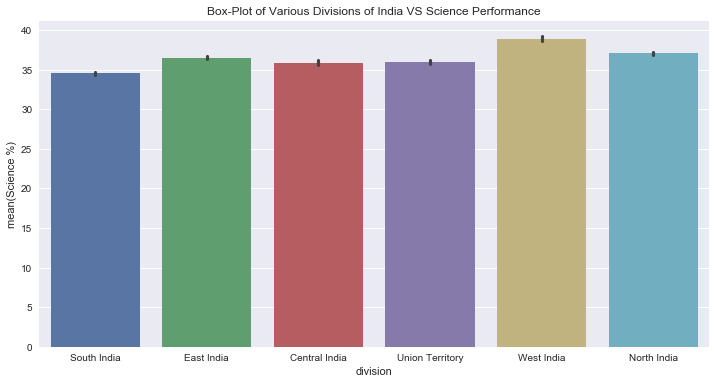

In [51]:
#Bar Plot
sns.plt.figure(figsize=(12, 6))
sns.plt.title('Box-Plot of Various Divisions of India VS Science Performance')
sns.barplot(x="division", y="Science %", data=data)
sns.plt.show()

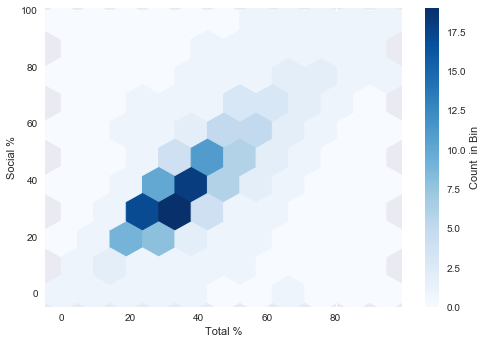

In [52]:
#Hexbin plot
plt.hexbin('Total %','Social %',gridsize=10,cmap='Blues',data=data,bins=20)
plt.xlabel('Total %')
plt.ylabel('Social %')
plt.colorbar(label='Count  in Bin')
plt.show()

In [237]:
#Cleaning the data for regression model
data=data.drop('State',1)
data=data.drop('categories',1)
data=data.drop('STUID',1)
data=data.drop('scoresBinned',1)
data=data.drop('Maths %',1)
data=data.drop('Science %',1)
data=data.drop('Social %',1)
data=data.drop('Reading %',1)
data=data.drop('lon',1)
data=data.drop('lat',1)
data=data.drop('District',1)


data = pd.get_dummies(data, drop_first=1)
               

data['performance']=np.where(data['Total %'] >40 , 1, 0)#np.mean(data['Total %'])
data=data.drop('Total %',1)


In [227]:
# Splitting data into train & test data for validation of the model
numtrain,numtest=int(0.7*data.shape[0]),int(0.3*data.shape[0])
np.random.shuffle(data.values)
train=data[:numtrain]
test=data[numtrain:(numtrain+numtest):]

In [228]:
# Using Logistic regression GLM model
est = sm.GLM(train['performance'], train.ix[0:,:67])

est2 = est.fit()
print(est2.summary())

C:\Users\SONY\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  


                 Generalized Linear Model Regression Results                  
Dep. Variable:            performance   No. Observations:               126541
Model:                            GLM   Df Residuals:                   126474
Model Family:                Gaussian   Df Model:                           66
Link Function:               identity   Scale:                  0.217969006577
Method:                          IRLS   Log-Likelihood:                -83134.
Date:                Tue, 31 Oct 2017   Deviance:                       27567.
Time:                        22:42:07   Pearson chi2:                 2.76e+04
No. Iterations:                     2                                         
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Age                         -0.0146      0.001    -12.523      0.000      -0.017      -0.012
Category  

In [229]:
#Validation & Accuracy of the Model
Y_pred = est2.predict(test.ix[0:,:67])
Y_pred=np.round(Y_pred,decimals=0)
x=np.mean(test['performance']==Y_pred)
print x

0.624041156513


C:\Users\SONY\Anaconda2\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  """Entry point for launching an IPython kernel.
